# **System Rekomendasi Tempat Wisata di Semarang**

## 1. Mengimpor Library Python yang Dibutuhkan

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

# Tambahan
from matplotlib.lines import Line2D
import folium

## 2. Menyiapkan Dataset yang digunakan

In [ ]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('https://raw.githubusercontent.com/redoti/Indonesia-Tourism-Destination/main/tourism_rating.csv')
place = pd.read_csv('https://raw.githubusercontent.com/redoti/Indonesia-Tourism-Destination/main/tourism_with_id.csv')
user = pd.read_csv('https://raw.githubusercontent.com/redoti/Indonesia-Tourism-Destination/main/user.csv')


## 3. Data Understanding

In [ ]:
# Melihat Detail Data
rating.head(1)

,User_Id,Place_Id,Place_Ratings
0,1,179,3


In [ ]:
# Melihat Detail Data
place.head(1)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1


In [ ]:
# Melihat Detail Data
user.head(1)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20


In [ ]:
# Membuang kolom yang tidak digunakan

place = place.drop(['Time_Minutes','Coordinate','Unnamed: 11','Unnamed: 12'],axis=1)
place.head(1)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153


In [ ]:
# Merubah data place agar hanya dari Kota Semarang

place = place[place['City']=='Semarang']
place.head(1)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
334,335,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,4.5,-7.209887,110.342112


In [ ]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Semarang

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head(1)

,User_Id,Place_Id,Place_Ratings
0,5,335,3


In [ ]:
# Melihat ukuran dataset rating untuk Kota Semarang

rating.shape

(10000, 3)

In [ ]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Semarang

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user.head()

,User_Id,Location,Age
23,1,"Semarang, Jawa Tengah",20
725,2,"Bekasi, Jawa Barat",21
1105,3,"Cirebon, Jawa Barat",23
326,4,"Bekasi, Jawa Barat",21
0,5,"Lampung, Sumatera Selatan",20


In [ ]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Semarang

user.shape

(300, 3)

In [ ]:
# Melihat info detail data

print('Dataset Rating')
rating.info()
print('='*50)

print('Dataset Place')
place.info()
print('='*50)

print('Dataset User')
user.info()

Dataset Rating
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
Dataset Place
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    f

## 4. Eksplorasi Data

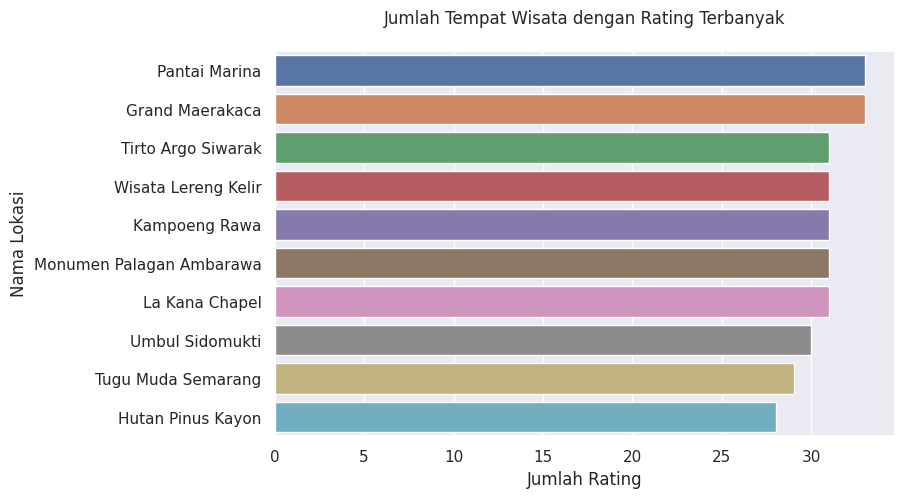

In [ ]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Nama Lokasi')
plt.xlabel('Jumlah Rating')
plt.show()

# Insight yang di dapat
# Mengetahui Top 10 Wisata di Semarang dengan jumlah rating terbanyak

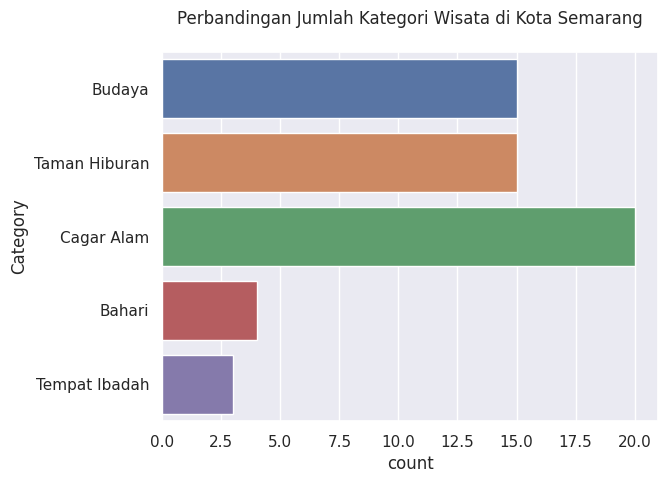

In [ ]:
# Membuat visualisasi jumlah kategori wisata di Kota Semarang

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Semarang', pad=20)
plt.show()

# Insight yang didapat
# Mengetahui jumlah tempat wisata di Semarang per kategori

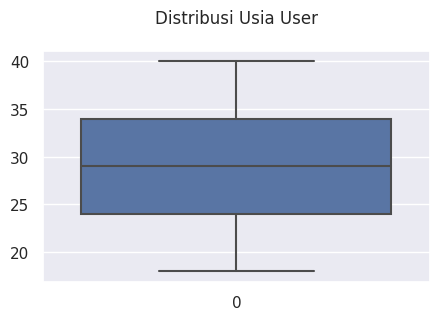

In [ ]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age'])
plt.title('Distribusi Usia User', pad=20)
plt.show()

# Insight yang didapat
# Mengetahui distribusi usia wisatawan (18-40 tahun) yang berkunjung ke tempat wisata di Semarang

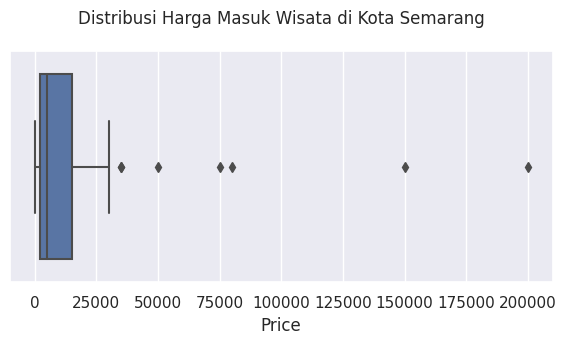

In [ ]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(x=place['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Semarang', pad=20)
plt.show()

# Insight yang didapat
# Mengetahui distribusi harga masuk tempat wisata di Semarang, ada beberapa yang menjadi outlier

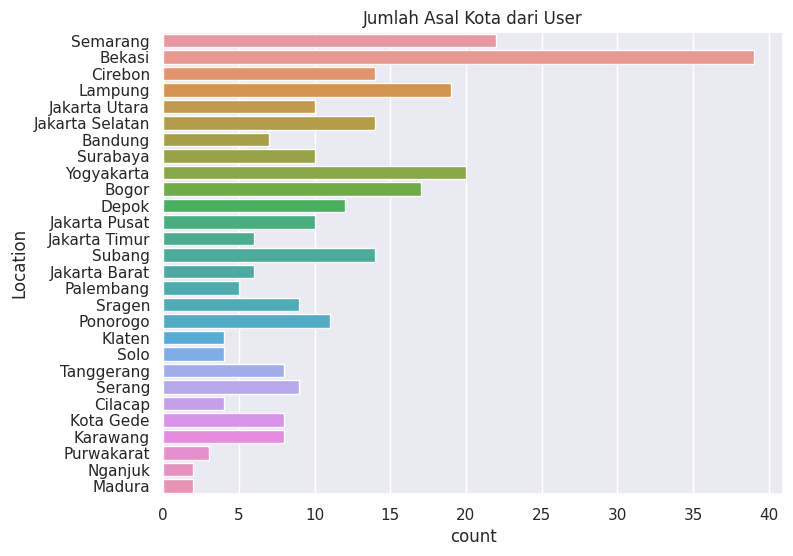

In [ ]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

# Insight yang didapat
# Mayoritas user adalah wisatawan dari luar kota

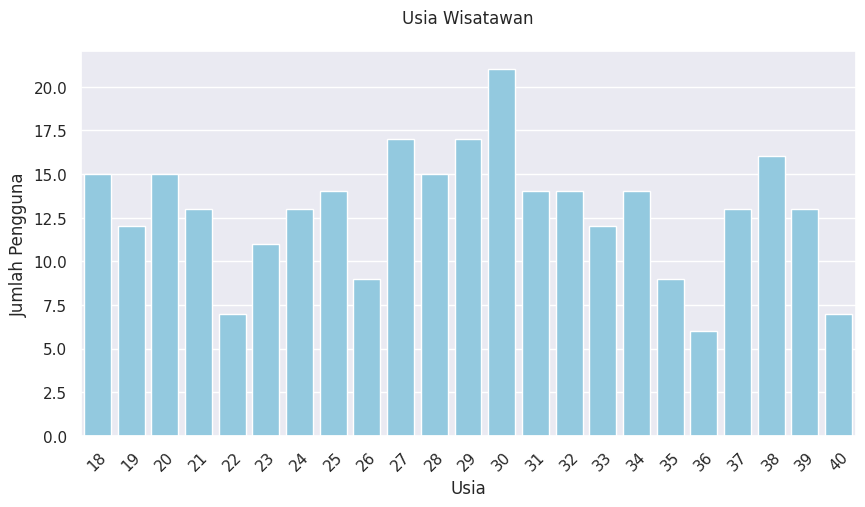

In [ ]:
# VISUALISASI TAMBAHAN

# Hitung jumlah pengguna
age_counts = user['Age'].value_counts().sort_index()

# Buat bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=age_counts.index, y=age_counts.values, color='skyblue')
plt.title('Usia Wisatawan', pad=20)
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

# Insight yang didapat
# Mengetahui jumlah wisatawan per umur dengan lebih jelas

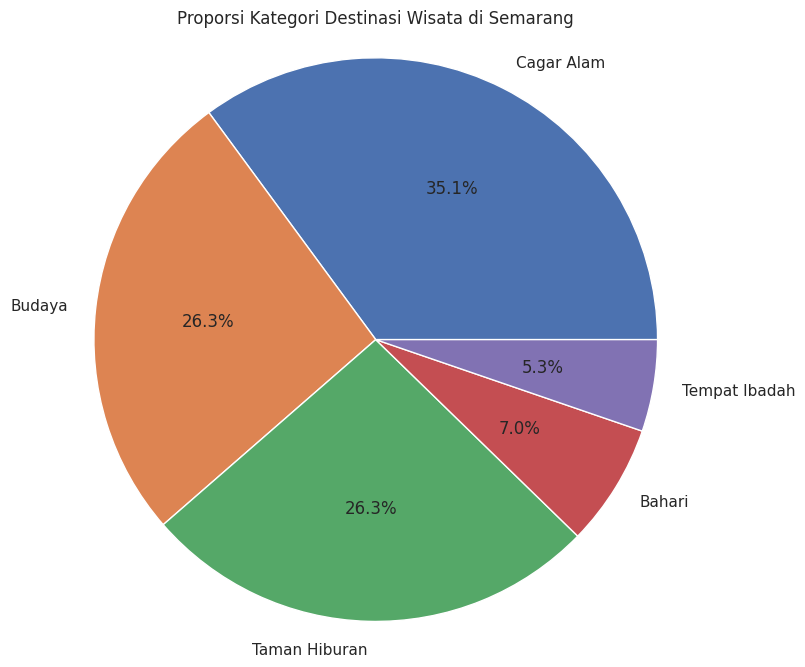

In [ ]:
# VISUALISASI TAMBAHAN

# Proporsi Kategori Destinasi Wisata di Semarang
categories = place['Category']

# Hitung jumlah kategori
category_counts = categories.value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proporsi Kategori Destinasi Wisata di Semarang')
plt.axis('equal')  # Untuk membuat lingkaran terlihat benar-benar lingkaran

# Tampilkan pie chart
plt.show()

# Insight yang didapat
# Mengetahui proporsi tempat wisata di Semarang per kategorinya

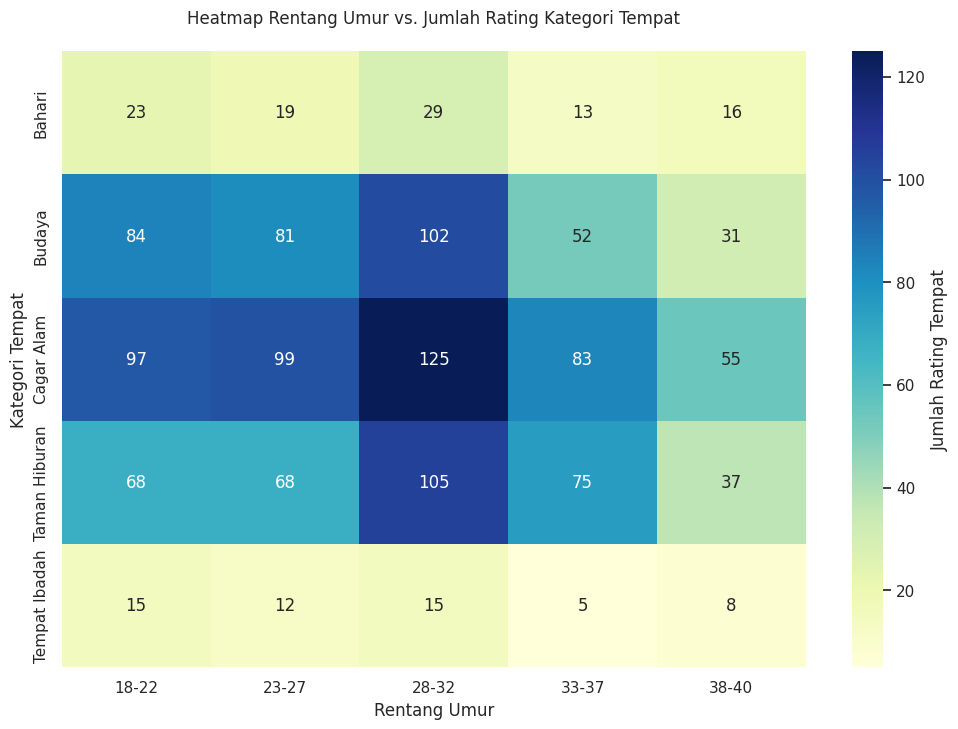

In [ ]:
# VISUALISASI TAMBAHAN

# Gabungkan data user dan rating berdasarkan User_Id
rating_user = pd.merge(rating, user, on='User_Id')

# Buat fungsi untuk mengelompokkan usia per 5 tahun dalam rentang 18-40
def age_group(age):
    if 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 27:
        return '23-27'
    elif 28 <= age <= 32:
        return '28-32'
    elif 33 <= age <= 37:
        return '33-37'
    elif 38 <= age <= 40:
        return '38-40'
    else:
        return 'Luar Rentang'  # Jika usia berada di luar rentang 18-40

# Terapkan fungsi ke kolom usia
rating_user['Age_Group'] = rating_user['Age'].apply(age_group)

# Gabungkan data dengan informasi kategori tempat
rating_user = pd.merge(rating_user, place[['Place_Id', 'Category']], on='Place_Id')

# Buat pivot table dengan jumlah rating tempat wisata oleh kelompok usia dan kategori
heatmap_data = rating_user.groupby(['Category', 'Age_Group'])['Place_Ratings'].count().unstack()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Jumlah Rating Tempat'})
plt.title('Heatmap Rentang Umur vs. Jumlah Rating Kategori Tempat', pad=20)
plt.xlabel('Rentang Umur')
plt.ylabel('Kategori Tempat')
plt.show()

# Insight yang didapat
# Mengetahui tempat wisata yang sering dikunjungi dalam rentang umur tertentu di Semarang

In [ ]:
# VISUALISASI TAMBAHAN

# Data
place_names = place['Place_Name']
latitudes = place['Lat']
longitudes = place['Long']
ratings = place['Rating']
prices = place['Price']

# Menghitung pusat peta
center_lat = sum(latitudes) / len(latitudes)
center_long = sum(longitudes) / len(longitudes)

# Membuat peta
m = folium.Map(location=[center_lat, center_long], zoom_start=10)

# Menambahkan marker dan anotasi untuk setiap lokasi
for name, lat, long, rat, price in zip(place_names, latitudes, longitudes, ratings, prices):
    # Gabungkan teks nama dan rating
    tooltip_text = f"{name}\nRating: {rat}\nPrice: {price}"

    # Menambahkan marker dengan anotasi dan warna berbeda jika rating > 4.5
    if rat >= 4.4:
        marker = folium.Marker(
            location=[lat, long],
            icon=folium.Icon(color='green'),
            tooltip=tooltip_text
        )
    else:
        marker = folium.Marker(
            location=[lat, long],
            icon=folium.Icon(color='blue'),
            tooltip=tooltip_text
        )
    marker.add_to(m)

# Menampilkan peta
m

# Insight yang didapat
# Mengetahui titik tempat wisata di Semarang beserta rating dan harga masuknya

## 5. Persiapan Data untuk Pemodelan

5.1. Membuat Salinan Data rating

In [ ]:
# Membaca dataset untuk dilakukan encoding

df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


**5.2. Melakukan Encoding**

5.2.1. Membuat Fungsi untuk Melakukan Encoding

In [ ]:
# Membuat Fungsi untuk Melakukan Encoding

def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

5.2.2. Encoding dan Mapping Kolom User

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

5.2.3. Encoding dan Mapping Kolom Place

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

**5.3. Melihat Gambaran Data untuk Pemodelan**

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)

# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(10)

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
6340,191,403,2.0,190,183
576,19,9,3.0,18,110
5202,158,372,2.0,157,346
6363,191,412,3.0,190,296
439,15,9,4.0,14,110


## 6. Pemodelan Machine Learning dengan RecommenderNet



6.1. Membagi data train dan test

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

**6.2. Menyiapkan Model**

6.2.1. Inisialisasi Fungsi

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_places = tf.tensordot(user_vector, places_vector, 2)

    x = dot_user_places + user_bias + places_bias

    return tf.nn.sigmoid(x) # activation sigmoid

6.2.2. Inisialisasi Model

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

6.2.2. Inisialisasi Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

6.2.3. Proses Training

In [ ]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()],
    verbose=0
)

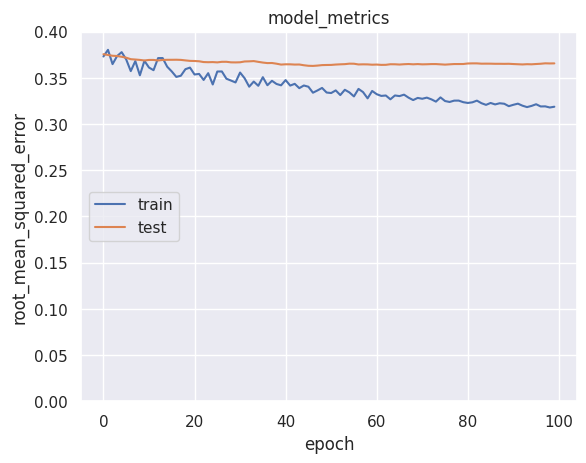

In [ ]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

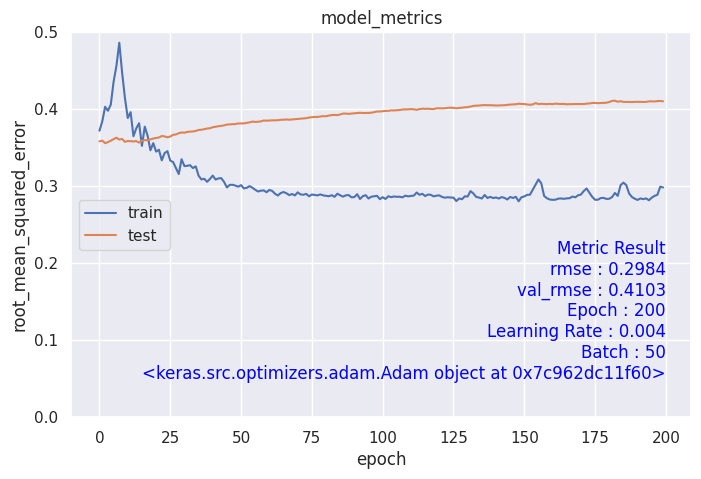

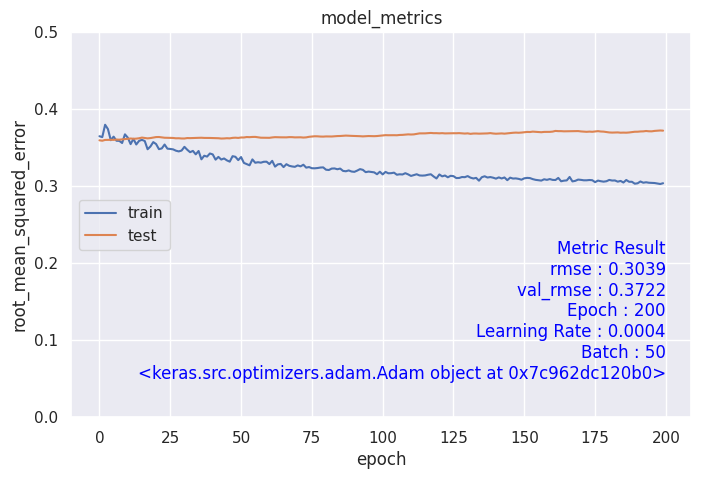

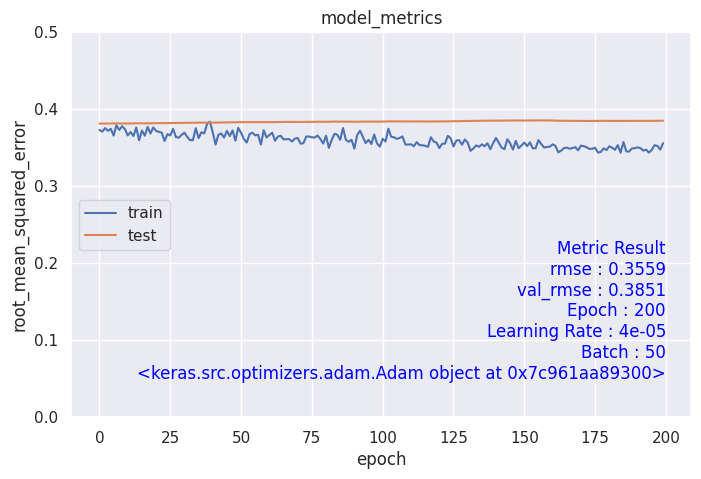

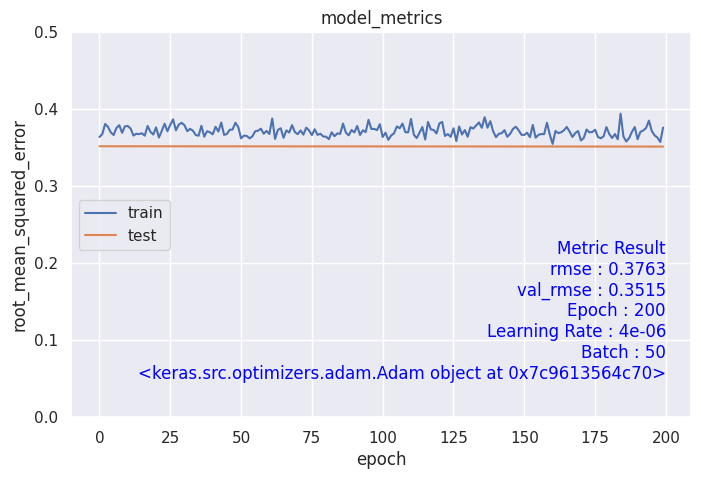

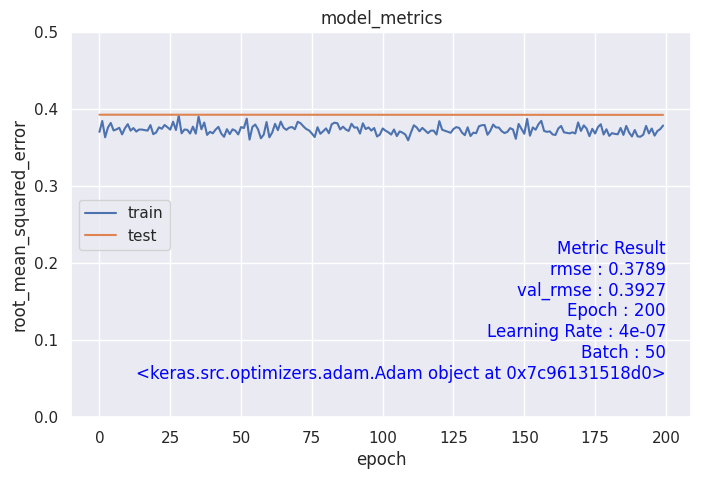

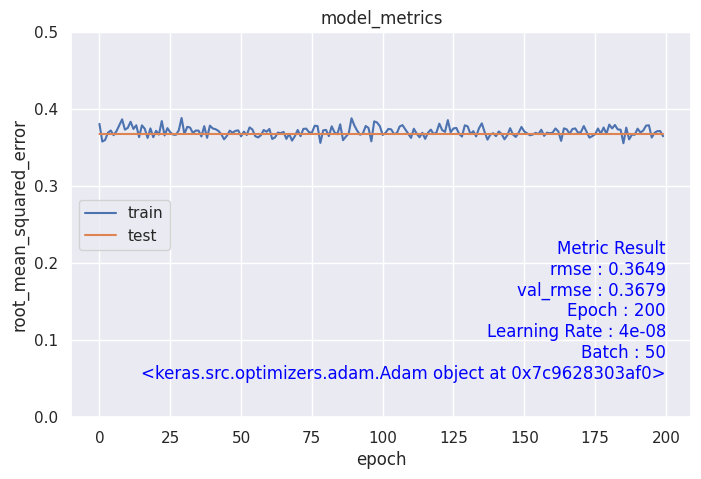

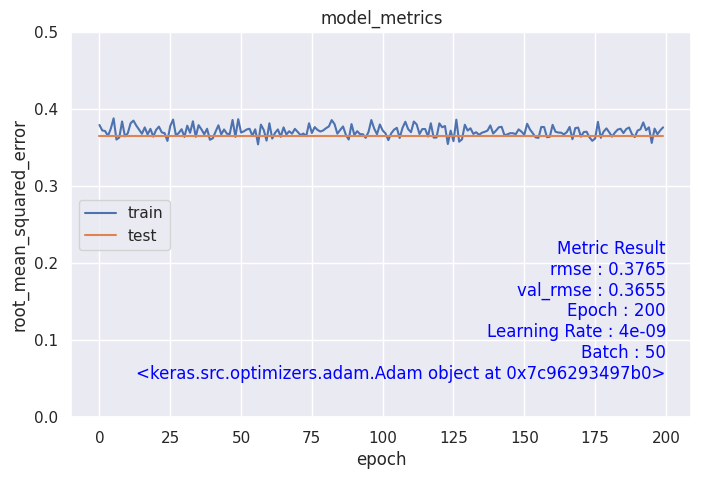

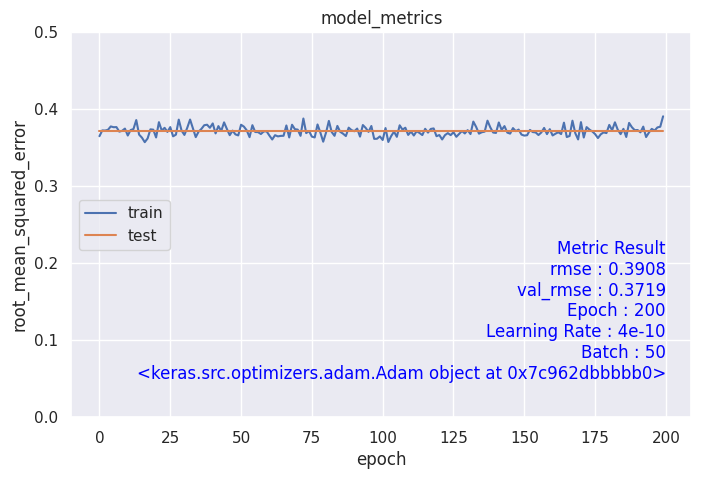

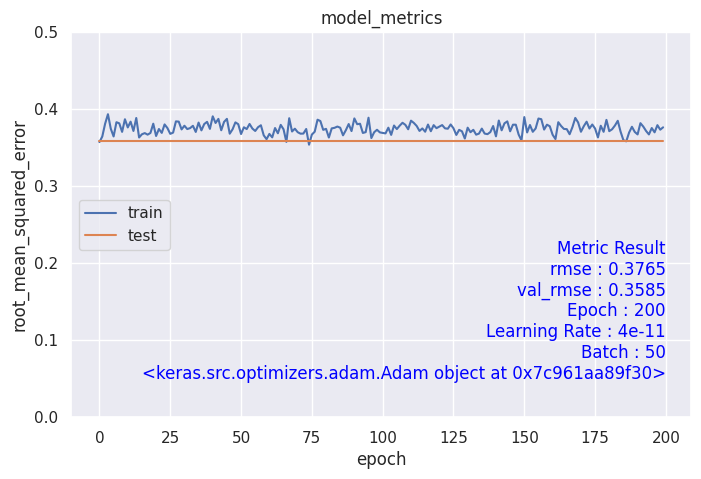

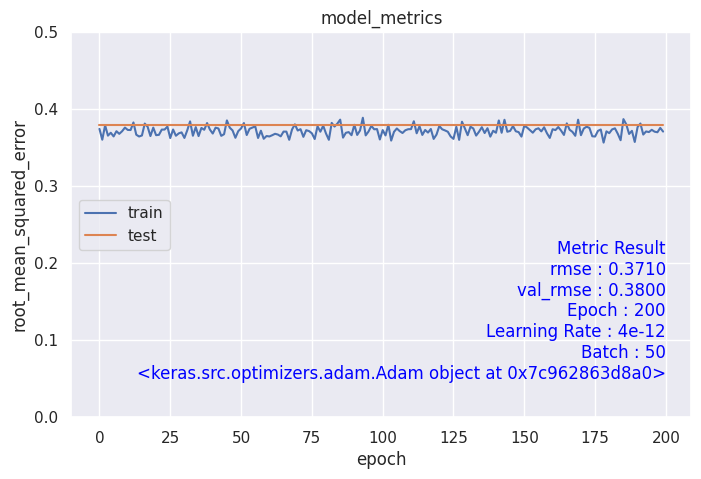

In [ ]:
# LOOPING UNTUK RISET TUNING

ini_epochs = [200]
ini_learnings = [0.004,0.0004, 0.00004, 0.000004, 0.0000004,0.00000004, 0.000000004, 0.0000000004, 0.00000000004, 0.000000000004]
ini_batchs = [50]

for batch in ini_batchs:

    for learning in ini_learnings:

        ini_optimizers = [keras.optimizers.Adam(learning_rate=learning),
                          ##keras.optimizers.SGD(learning_rate=learning, momentum=0.9),
                          #keras.optimizers.RMSprop(learning_rate=learning),
                          ##keras.optimizers.Adagrad(learning_rate=learning),
                          ##keras.optimizers.Adadelta()
                            ]

        for optimizer in ini_optimizers:

            for epoch in ini_epochs:
                # Create a new figure for each combination of hyperparameters
                plt.figure(figsize=(8, 5))

                model = RecommenderNet(num_users, num_place, batch)  # inisialisasi model

                # model compile
                model.compile(
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=optimizer,
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

                # Memulai training
                history = model.fit(
                    x=x_train,
                    y=y_train,
                    epochs=epoch,
                    validation_data=(x_val, y_val),
                    callbacks=[myCallback()],
                    verbose=0)

                # Menampilkan plot loss dan validation
                plt.plot(history.history['root_mean_squared_error'])
                plt.plot(history.history['val_root_mean_squared_error'])
                plt.title(f'model_metrics')
                plt.ylabel('root_mean_squared_error')
                plt.xlabel('epoch')
                plt.ylim(ymin=0, ymax=0.5)
                plt.legend(['train', 'test'], loc='center left')

                # Convert the history dictionary to a string and display it on the plot
                plt.text(epoch, 0.05,
                         f"Metric Result\nrmse : {history.history['root_mean_squared_error'][-1]:.4f}\nval_rmse : {history.history['val_root_mean_squared_error'][-1]:.4f}\nEpoch : {epoch}\nLearning Rate : {learning}\nBatch : {batch}\n{optimizer}",
                         fontsize=12, color='blue', horizontalalignment='right')

                # Show the current plot
                plt.show()


## 7. Memprediksi Top 10 Rekomendasi

7.1 Menyiapkan DataFrame untuk Menampilkan Hasil Rekomendasi

In [ ]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

7.2. Menyiapkan contoh User untuk Menampilkan Rekomendasi

7.2.1 Mencari User

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

7.2.2. Mencari Lokasi yang belum Dikunjungi User

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

7.3. Menampilkan Hasil Rekomendasi untuk User

In [ ]:
# Mengambil top 10 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,11)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

2/2 [==============================] - 0s 4ms/step
Daftar rekomendasi untuk: User 258

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Candi Gedong Songo : Budaya
Pantai Marina : Bahari
Semarang Contemporary Art Gallery : Budaya
Masjid Agung Ungaran : Tempat Ibadah

------------------------------------------------------------
Top 10 place recommendation
------------------------------------------------------------
1 . Grand Maerakaca 
     Taman Hiburan , Harga Tiket Masuk  15000 , Rating Wisata  4.4 

2 . Sam Poo Kong Temple 
     Budaya , Harga Tiket Masuk  35000 , Rating Wisata  4.5 

3 . Pura Giri Natha 
     Budaya , Harga Tiket Masuk  20000 , Rating Wisata  4.7 

4 . Wisata Mangrove Tapak 
     Cagar Alam , Harga Tiket Masuk  5000 , Rating Wisata  4.3 

5 . Saloka Theme Park 
     Taman Hiburan , Harga Tiket Masuk  150000 , Rating Wisata  4.4 

6 . Taman Bu